# Heart Disease Classification - ML Models Comparison

This notebook implements 6 classification models on the Heart Disease dataset and evaluates them using 6 metrics.

## 1. Import Libraries

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Evaluation Metrics
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score,
    recall_score, f1_score, matthews_corrcoef,
    confusion_matrix, classification_report
)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load and Explore Dataset

In [ ]:
# Load the Heart Disease dataset
# Download from: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
df = pd.read_csv('../data/heart.csv')

print("Dataset Shape:", df.shape)
print(f"\nFeatures: {df.shape[1] - 1}")
print(f"Instances: {df.shape[0]}")
df.head()

Dataset Shape: (918, 12)

Features: 11
Instances: 918


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# Dataset Info
print("Dataset Information:")
print("="*50)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
# Check for missing values
print("Missing Values:")
print("="*50)
print(df.isnull().sum())

Missing Values:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [ ]:
# Statistical Summary
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Target Variable Distribution:
HeartDisease
1    508
0    410
Name: count, dtype: int64


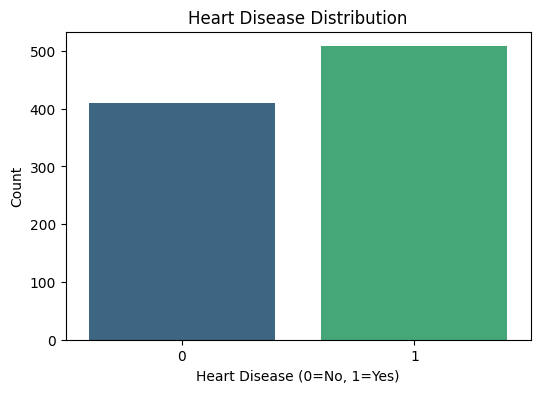

In [ ]:
# Target Distribution
print("Target Variable Distribution:")
print("="*50)
print(df['HeartDisease'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x='HeartDisease', data=df, palette='viridis')
plt.title('Heart Disease Distribution')
plt.xlabel('Heart Disease (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

## 3. Data Preprocessing

In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_cols)

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('HeartDisease')  # Remove target
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
Numerical Columns: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']


In [ ]:
# One-Hot Encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("Shape after encoding:", df_encoded.shape)
df_encoded.head()

Shape after encoding: (918, 16)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


In [ ]:
# Separate features and target
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print(f"\nTotal Features: {X.shape[1]}")

Features shape: (918, 15)
Target shape: (918,)

Total Features: 15


In [ ]:
# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 734
Test set size: 184


In [ ]:
# Feature Scaling (important for KNN and Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed!")

Feature scaling completed!


## 4. Model Training and Evaluation

We will implement 6 classification models and evaluate each using 6 metrics:
1. Accuracy
2. AUC Score
3. Precision
4. Recall
5. F1 Score
6. Matthews Correlation Coefficient (MCC)

In [ ]:
# Function to evaluate model and return metrics
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Train model and calculate all evaluation metrics
    """
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred
    
    # Calculate metrics
    metrics = {
        'Model': model_name,
        'Accuracy': round(accuracy_score(y_test, y_pred), 4),
        'AUC': round(roc_auc_score(y_test, y_pred_proba), 4),
        'Precision': round(precision_score(y_test, y_pred), 4),
        'Recall': round(recall_score(y_test, y_pred), 4),
        'F1': round(f1_score(y_test, y_pred), 4),
        'MCC': round(matthews_corrcoef(y_test, y_pred), 4)
    }
    
    return metrics, y_pred, model

In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### 4.1 Logistic Regression

Logistic Regression Results:
Accuracy: 0.8859
AUC: 0.9297
Precision: 0.8716
Recall: 0.9314
F1: 0.9005
MCC: 0.7694


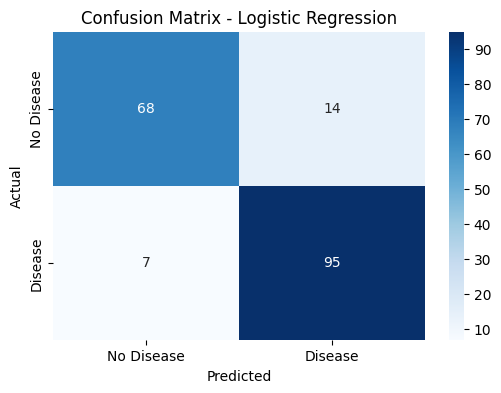


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        82
           1       0.87      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



In [ ]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_metrics, lr_pred, lr_trained = evaluate_model(
    lr_model, X_train_scaled, X_test_scaled, y_train, y_test, 'Logistic Regression'
)

print("Logistic Regression Results:")
print("="*50)
for key, value in lr_metrics.items():
    if key != 'Model':
        print(f"{key}: {value}")

plot_confusion_matrix(y_test, lr_pred, 'Logistic Regression')
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))

### 4.2 Decision Tree Classifier

Decision Tree Results:
Accuracy: 0.7989
AUC: 0.8194
Precision: 0.8155
Recall: 0.8235
F1: 0.8195
MCC: 0.5926


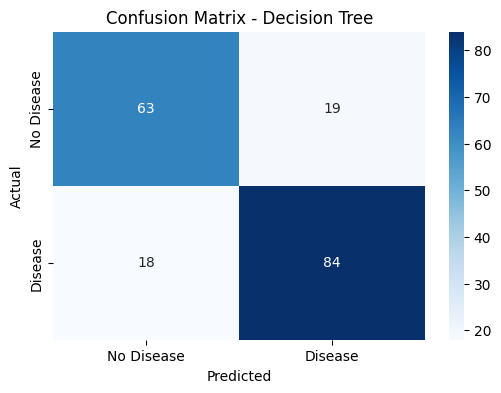


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.77      0.77        82
           1       0.82      0.82      0.82       102

    accuracy                           0.80       184
   macro avg       0.80      0.80      0.80       184
weighted avg       0.80      0.80      0.80       184



In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_metrics, dt_pred, dt_trained = evaluate_model(
    dt_model, X_train, X_test, y_train, y_test, 'Decision Tree'
)

print("Decision Tree Results:")
print("="*50)
for key, value in dt_metrics.items():
    if key != 'Model':
        print(f"{key}: {value}")

plot_confusion_matrix(y_test, dt_pred, 'Decision Tree')
print("\nClassification Report:")
print(classification_report(y_test, dt_pred))

### 4.3 K-Nearest Neighbors (KNN)

K-Nearest Neighbors Results:
Accuracy: 0.8859
AUC: 0.936
Precision: 0.8857
Recall: 0.9118
F1: 0.8986
MCC: 0.7686


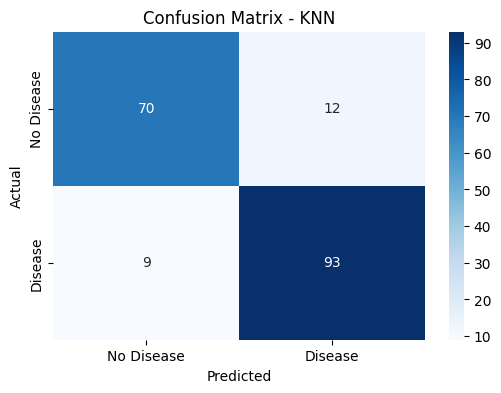


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        82
           1       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



In [ ]:
# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_metrics, knn_pred, knn_trained = evaluate_model(
    knn_model, X_train_scaled, X_test_scaled, y_train, y_test, 'KNN'
)

print("K-Nearest Neighbors Results:")
print("="*50)
for key, value in knn_metrics.items():
    if key != 'Model':
        print(f"{key}: {value}")

plot_confusion_matrix(y_test, knn_pred, 'KNN')
print("\nClassification Report:")
print(classification_report(y_test, knn_pred))

### 4.4 Naive Bayes (Gaussian)

Naive Bayes Results:
Accuracy: 0.913
AUC: 0.9451
Precision: 0.93
Recall: 0.9118
F1: 0.9208
MCC: 0.8246


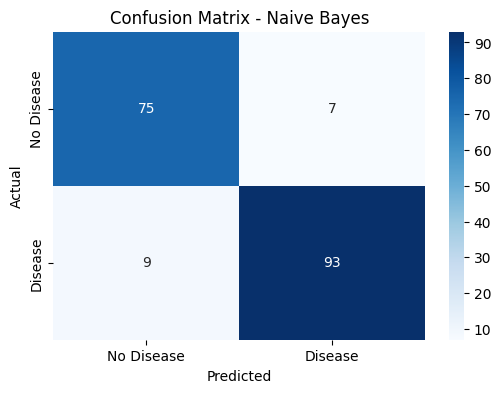


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        82
           1       0.93      0.91      0.92       102

    accuracy                           0.91       184
   macro avg       0.91      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184



In [ ]:
# Gaussian Naive Bayes
nb_model = GaussianNB()
nb_metrics, nb_pred, nb_trained = evaluate_model(
    nb_model, X_train_scaled, X_test_scaled, y_train, y_test, 'Naive Bayes'
)

print("Naive Bayes Results:")
print("="*50)
for key, value in nb_metrics.items():
    if key != 'Model':
        print(f"{key}: {value}")

plot_confusion_matrix(y_test, nb_pred, 'Naive Bayes')
print("\nClassification Report:")
print(classification_report(y_test, nb_pred))

### 4.5 Random Forest (Ensemble)

Random Forest Results:
Accuracy: 0.8804
AUC: 0.9366
Precision: 0.8846
Recall: 0.902
F1: 0.8932
MCC: 0.7576


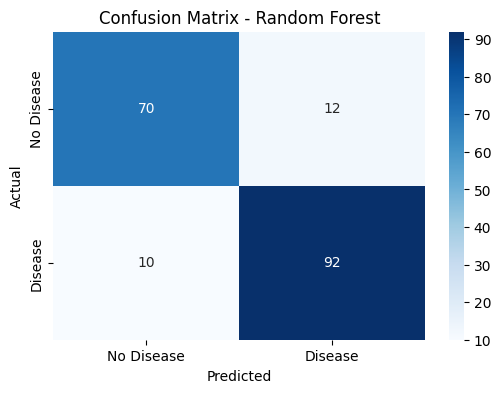


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        82
           1       0.88      0.90      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



In [ ]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_metrics, rf_pred, rf_trained = evaluate_model(
    rf_model, X_train, X_test, y_train, y_test, 'Random Forest'
)

print("Random Forest Results:")
print("="*50)
for key, value in rf_metrics.items():
    if key != 'Model':
        print(f"{key}: {value}")

plot_confusion_matrix(y_test, rf_pred, 'Random Forest')
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

### 4.6 XGBoost (Ensemble)

XGBoost Results:
Accuracy: 0.8641
AUC: 0.9204
Precision: 0.8738
Recall: 0.8824
F1: 0.878
MCC: 0.7247


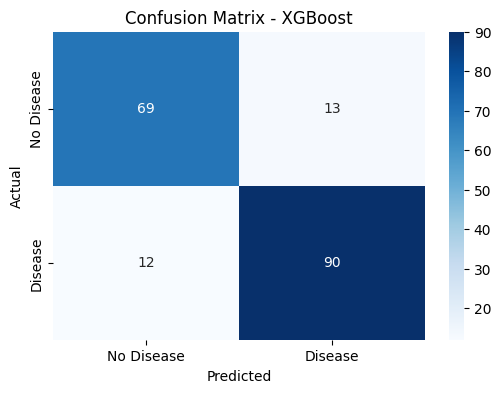


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85        82
           1       0.87      0.88      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



In [ ]:
# XGBoost
xgb_model = XGBClassifier(n_estimators=100, random_state=42, max_depth=5, 
                          learning_rate=0.1, use_label_encoder=False, 
                          eval_metric='logloss')
xgb_metrics, xgb_pred, xgb_trained = evaluate_model(
    xgb_model, X_train, X_test, y_train, y_test, 'XGBoost'
)

print("XGBoost Results:")
print("="*50)
for key, value in xgb_metrics.items():
    if key != 'Model':
        print(f"{key}: {value}")

plot_confusion_matrix(y_test, xgb_pred, 'XGBoost')
print("\nClassification Report:")
print(classification_report(y_test, xgb_pred))

## 5. Model Comparison

In [ ]:
# Combine all metrics into a DataFrame
all_metrics = [lr_metrics, dt_metrics, knn_metrics, nb_metrics, rf_metrics, xgb_metrics]
results_df = pd.DataFrame(all_metrics)
results_df = results_df.set_index('Model')

print("="*80)
print("MODEL COMPARISON TABLE")
print("="*80)
print(results_df.to_string())
print("="*80)

MODEL COMPARISON TABLE
                     Accuracy     AUC  Precision  Recall      F1     MCC
Model                                                                   
Logistic Regression    0.8859  0.9297     0.8716  0.9314  0.9005  0.7694
Decision Tree          0.7989  0.8194     0.8155  0.8235  0.8195  0.5926
KNN                    0.8859  0.9360     0.8857  0.9118  0.8986  0.7686
Naive Bayes            0.9130  0.9451     0.9300  0.9118  0.9208  0.8246
Random Forest          0.8804  0.9366     0.8846  0.9020  0.8932  0.7576
XGBoost                0.8641  0.9204     0.8738  0.8824  0.8780  0.7247


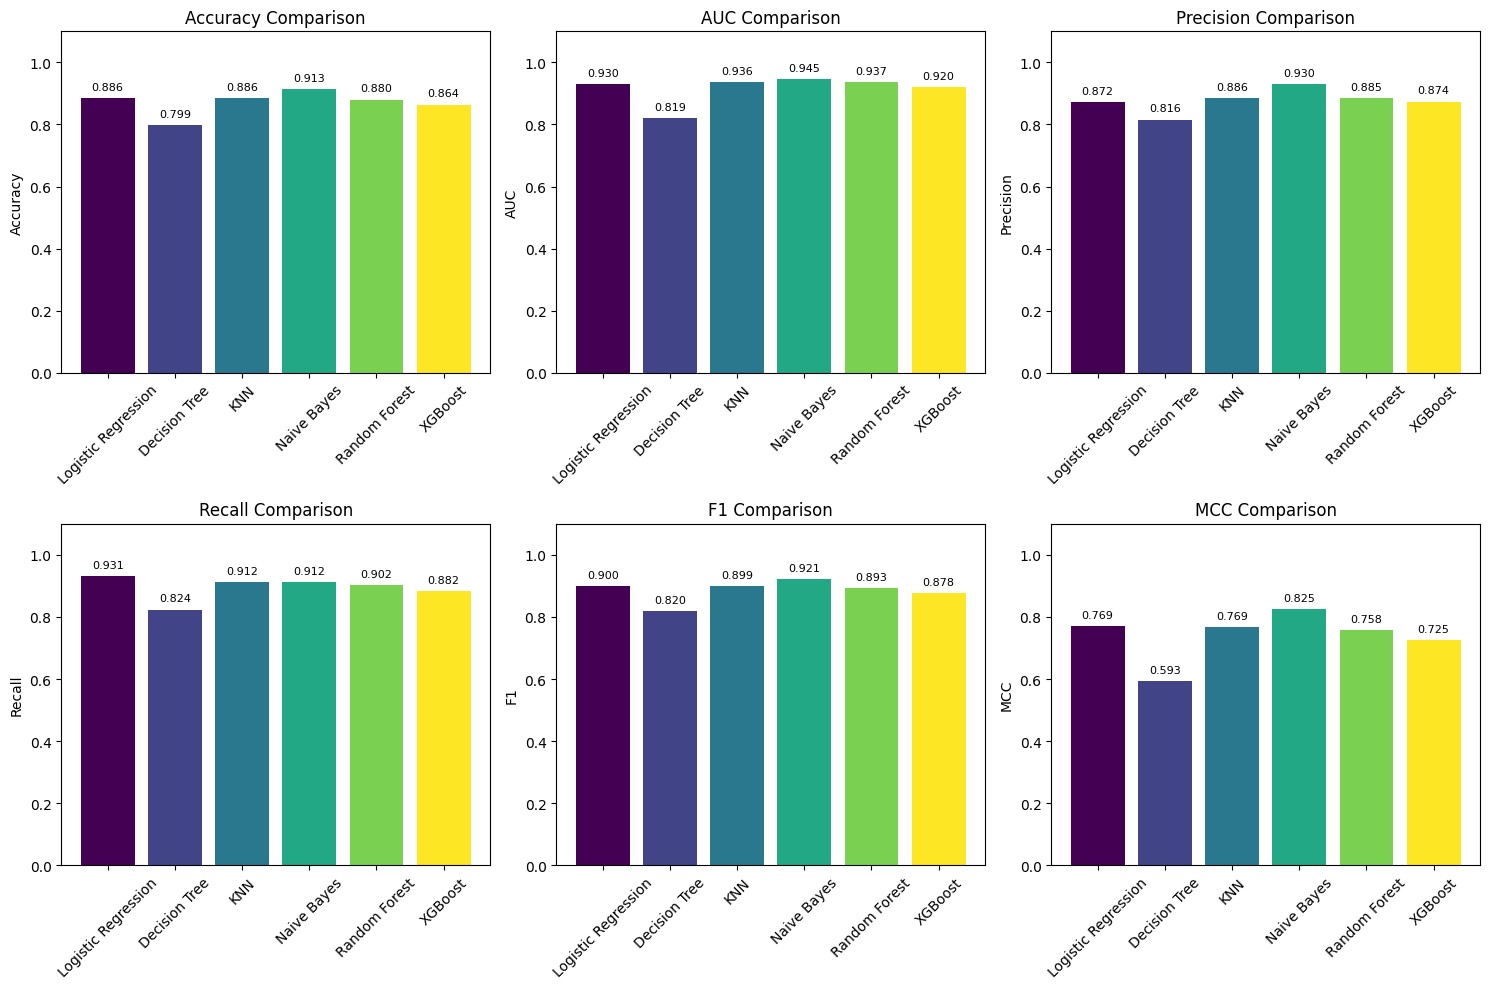

In [ ]:
# Visualize model comparison
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
metrics_to_plot = ['Accuracy', 'AUC', 'Precision', 'Recall', 'F1', 'MCC']

for idx, metric in enumerate(metrics_to_plot):
    ax = axes[idx // 3, idx % 3]
    values = results_df[metric].values
    models = results_df.index.tolist()
    
    bars = ax.bar(models, values, color=plt.cm.viridis(np.linspace(0, 1, len(models))))
    ax.set_title(f'{metric} Comparison')
    ax.set_ylabel(metric)
    ax.set_ylim(0, 1.1)
    ax.tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for bar, val in zip(bars, values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
                f'{val:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig('../model_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
# Find best model for each metric
print("\nBest Model for Each Metric:")
print("="*50)
for metric in metrics_to_plot:
    best_model = results_df[metric].idxmax()
    best_score = results_df[metric].max()
    print(f"{metric}: {best_model} ({best_score:.4f})")


Best Model for Each Metric:
Accuracy: Naive Bayes (0.9130)
AUC: Naive Bayes (0.9451)
Precision: Naive Bayes (0.9300)
Recall: Logistic Regression (0.9314)
F1: Naive Bayes (0.9208)
MCC: Naive Bayes (0.8246)


## 6. Save Models for Streamlit App

In [ ]:
import pickle

# Save all trained models
models_dict = {
    'Logistic Regression': lr_trained,
    'Decision Tree': dt_trained,
    'KNN': knn_trained,
    'Naive Bayes': nb_trained,
    'Random Forest': rf_trained,
    'XGBoost': xgb_trained
}

# Save models
for name, model in models_dict.items():
    filename = f'../saved_models/{name.lower().replace(" ", "_")}.pkl'
    with open(filename, 'wb') as f:
        pickle.dump(model, f)
    print(f"Saved: {filename}")

# Save scaler
with open('../saved_models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("Saved: ../saved_models/scaler.pkl")

# Save feature names
with open('../saved_models/feature_names.pkl', 'wb') as f:
    pickle.dump(X.columns.tolist(), f)
print("Saved: ../saved_models/feature_names.pkl")

Saved: ../saved_models/logistic_regression.pkl
Saved: ../saved_models/decision_tree.pkl
Saved: ../saved_models/knn.pkl
Saved: ../saved_models/naive_bayes.pkl
Saved: ../saved_models/random_forest.pkl
Saved: ../saved_models/xgboost.pkl
Saved: ../saved_models/scaler.pkl
Saved: ../saved_models/feature_names.pkl


## 7. Summary

This notebook implemented 6 classification models on the Heart Disease dataset:

1. **Logistic Regression** - Linear model for binary classification
2. **Decision Tree** - Tree-based model with interpretable rules
3. **K-Nearest Neighbors (KNN)** - Instance-based learning algorithm
4. **Naive Bayes (Gaussian)** - Probabilistic classifier based on Bayes theorem
5. **Random Forest** - Ensemble of decision trees (bagging)
6. **XGBoost** - Gradient boosting ensemble method

Each model was evaluated using 6 metrics:
- Accuracy
- AUC (Area Under ROC Curve)
- Precision
- Recall
- F1 Score
- Matthews Correlation Coefficient (MCC)